In [3]:
import pandas
import numpy as np
import dask.dataframe as dd

import tqdm
import json
from collections import defaultdict
from dask.diagnostics import ProgressBar


In [2]:
file = 'data/paper_complete_infos.csv'

In [3]:
d = dd.read_csv(file, sep='\t', header=None, names=['paper_id', 'doi', 'year', 'authors', 'cits', 'cits_detail'], 
                dtype={'authors': str})
d.head()

,paper_id,doi,year,authors,cits,cits_detail
0,9,NaN,2006.0,2632942543,NaN,NaN
1,15,10.1007/978-3-642-32197-9_8,2013.0,"199142497,680395887",NaN,NaN
2,23,NaN,2012.0,"1243978490,2582258949,2582736345",2.0,"{""2019"": 1, ""2020"": 1}"
3,58,NaN,1973.0,"2641488431,2693978806",NaN,NaN
4,79,NaN,2009.0,"2662843304,2683440697",NaN,NaN


In [4]:
d = d[d['year'] <= 2020]
d = d[d['year'] >= 1950]
d = d.dropna(subset=['year', 'authors'])

In [5]:
# def temp_test(bla):
#     return bla.apply(lambda x: x.authors.count(',') + 1, meta=(int), axis=1)
    
# r = d.assign(n_authors=temp_test)

# from dask.diagnostics import ProgressBar
# with ProgressBar():
#     r[['paper_id', 'n_authors']].to_csv('data/papers_number_of_authors', sep='\t', header=None, index=False)

[########################################] | 100% Completed | 40min 38.9s


In [5]:
papers_number_of_authors = dd.read_csv('data/papers_number_of_authors/*', sep='\t', header=None)
papers_number_of_authors.columns = ['paper_id', 'number_of_authors']
papers_number_of_authors = papers_number_of_authors.set_index('paper_id', sorted=True)
papers_number_of_authors.head()

,number_of_authors
paper_id,
9,1
15,2
23,3
58,2
79,2


In [6]:
fos_papers = dd.read_csv('data/PaperFOS_split/paper_fos_dict*', sep='\t', header=None)
fos_papers.columns = ['paper_id', 'parent_id']
fos_papers = fos_papers.dropna(subset=['parent_id'])
fos_papers.head()

,paper_id,parent_id
0,15,"{""138885662"": 0.25, ""142362112"": 0.25, ""177444..."
1,23,"{""71924100"": 0.8, ""86803240"": 0.15, ""185592680..."
2,58,"{""33923547"": 0.2, ""121332964"": 0.6000000000000..."
3,79,"{""86803240"": 0.4, ""185592680"": 0.1, ""71924100""..."
4,108,"{""138885662"": 0.525, ""142362112"": 0.3666666666..."


In [7]:
papers_num_authors = defaultdict(lambda:[])

with ProgressBar():
    temp = papers_number_of_authors.merge(fos_papers, on='paper_id')
print(temp.head())

     paper_id  number_of_authors  \
0  2796953996                  1   
1  2796963714                  1   
2  2796964691                  2   
3  2796964893                  2   
4  2796965166                  1   

                                           parent_id  
0  {"138885662": 0.25, "142362112": 0.58333333333...  
1                                  {"71924100": 1.0}  
2  {"17744445": 0.14285714285714285, "162324750":...  
3  {"127413603": 0.1111111111111111, "41008148": ...  
4  {"17744445": 0.5, "162324750": 0.25, "14402440...  


In [ ]:
temp.to_csv('paper_fields_number_of_authors', sep='\t', single_file=True)

In [2]:
SUFFIX = 2020
C1 = json.load(open('results/cits_10a_full_%d.json' % SUFFIX))
P1 = json.load(open('results/papers_10a_full_%d.json' % SUFFIX))
C2 = json.load(open('results/cits_full_%d.json' % SUFFIX))
P2 = json.load(open('results/papers_full_%d.json' % SUFFIX))

In [3]:
len(C1)

2630275

In [4]:
len(C2)

1289417

In [4]:
import pandas as pd
temp = dd.read_csv('temp/paper_fields_number_of_authors', sep='\t')
temp.head()

,Unnamed: 0,paper_id,number_of_authors,parent_id
0,0,2793762076,3,"{""41008148"": 0.5999999999999999, ""127413603"": ..."
1,1,2793769416,3,"{""71924100"": 0.8095238095238095, ""86803240"": 0..."
2,2,2793771443,2,"{""121332964"": 0.5, ""86803240"": 0.25, ""18559268..."
3,3,2793775085,4,"{""33923547"": 0.9083333333333334, ""127413603"": ..."
4,4,2793776991,1,"{""138885662"": 0.16999999999999998, ""86803240"":..."


In [ ]:
# papers_fos_authors = defaultdict(lambda:defaultdict(lambda:0))
# for idx, row in temp.iterrows():
#     fos = json.loads(row['parent_id'])
#     for f,w in fos.items():
#         papers_fos_authors[f][row['number_of_authors']] += 1

In [5]:
temp = temp[temp['number_of_authors'] <= 10].groupby('number_of_authors').count()

In [14]:
temp.head(10)

,Unnamed: 0,paper_id,parent_id
number_of_authors,,,
1,87700674,87700674,87700674
2,40213940,40213940,40213940
3,28593371,28593371,28593371
4,19074628,19074628,19074628
5,12292853,12292853,12292853
6,8240556,8240556,8240556
7,4867624,4867624,4867624
8,3329754,3329754,3329754
9,2037600,2037600,2037600


In [6]:
x = []
y = []
for idx, row in temp.iterrows():
    x.append(idx)
    y.append(row[0])

In [16]:
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [17]:
y

[87700674,
 40213940,
 28593371,
 19074628,
 12292853,
 8240556,
 4867624,
 3329754,
 2037600,
 1569059]

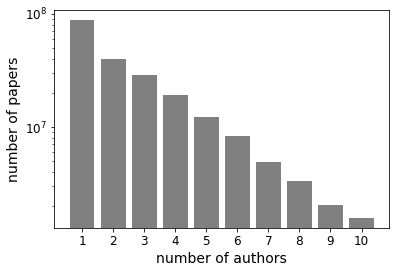

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.Figure(figsize=(9,3))
plt.bar(x, y, color='gray')
plt.yscale('log')
plt.xlabel('number of authors', fontsize=14)
plt.ylabel('number of papers', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('numberofauthors.pdf')

In [2]:
import json

SUFFIX = 2020
SUFFIX_STR = '_%d' % SUFFIX

H = json.load(open('results/hindex_10a_full_%d.json' % SUFFIX))
C = json.load(open('results/cits_10a_full_%d.json' % SUFFIX))
P = json.load(open('results/papers_10a_full_%d.json' % SUFFIX))
WS = json.load(open('results/ws_10a_full_%d.json' % SUFFIX))
WP = json.load(open('results/wp_10a_full_%d.json' % SUFFIX))
CL = json.load(open('results/citlist_10a_full_%d.json' % SUFFIX))
Y = json.load(open('results/birth_10a_full_%d.json' % SUFFIX))
CH = json.load(open('results/ch_10a_full_%d.json' % SUFFIX))
FOS = json.load(open('results/fos_10a_full_%d.json' % SUFFIX))

In [4]:
Y = [len(x) for x in CL]

In [16]:
for c in C:
    
    if int(c) < 195:
        print('eita')
        print(c)

eita
194.0
eita
87.0
eita
188.0
eita
185.0
eita
191.0
eita
190.0
eita
191.0
eita
192.0
eita
189.0
eita
194.0
eita
194.0


In [7]:
u,c

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
         110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
         121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
         132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
         143,  144,  145,  146,  147, 

In [20]:
SUFFIX = 2020
SUFFIX_STR = '_%d' % SUFFIX

C = json.load(open('results/cits_rev1_full_%d.json' % SUFFIX))
P = json.load(open('results/papers_rev1_full_%d.json' % SUFFIX))

In [22]:
for c in P:
    
    if int(c) < 195:
        print('eita')
        print(c)
        break

eita
1
